In [10]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("portuguese")
plt.style.use('fivethirtyeight')
data = pd.read_csv(r"clean-boatos.org-2022-12-19.csv", encoding="utf-8")
data['Length'] = data['title'].apply(len)
data.groupby('Length').describe().head(20)

Unnamed: 0                                                             \
            count         mean         std     min      25%     50%      75%   
Length                                                                         
35            2.0   729.500000    0.707107   729.0   729.25   729.5   729.75   
38            2.0   389.500000    0.707107   389.0   389.25   389.5   389.75   
41            2.0   569.500000    0.707107   569.0   569.25   569.5   569.75   
42            1.0   140.000000         NaN   140.0   140.00   140.0   140.00   
46            1.0  1186.000000         NaN  1186.0  1186.00  1186.0  1186.00   
47            8.0   876.875000  424.771682   117.0   545.00  1163.0  1168.25   
48            5.0   746.200000  409.796535   404.0   405.00   540.0  1190.00   
49            1.0   585.000000         NaN   585.0   585.00   585.0   585.00   
50            5.0   611.600000  370.955253   302.0   303.00   509.0   761.00   
51            6.0   463.666667  261.417418   269.0   270.25   326.0   667.50   
52            6.0   649.000000  462.157116   179.0   245.75   580.0  1065.75   
53            6.0   259.500000  123.221346   188.0   189.25   190.5   278.00   
54            4.0   807.250000  290.426554   408.0   684.00   899.0  1022.25   
55            7.0   491.857143  438.449324    28.0   121.00   541.0   724.00   
56            9.0   410.888889  272.769795   130.0   185.00   350.0   436.00   
57            6.0   573.500000  517.027949   133.0   136.50   397.5  1054.50   
58           18.0   758.111111  268.433777   254.0   544.25   835.0   886.25   
59           14.0   656.214286  192.131437   357.0   531.00   688.0   827.75   
60           22.0   667.090909  438.686775    26.0   161.25   846.5  1024.25   
61           14.0   822.714286  238.998368   334.0   691.25   781.5   994.75   

               Unnamed: 6                                     
           max      count mean  std  min  25%  50%  75%  max  
Length                                                        
35       730.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
38       390.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
41       570.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
42       140.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
46      1186.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
47      1189.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
48      1192.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
49       585.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50      1183.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
51       828.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
52      1193.0        2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
53       492.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
54      1023.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
55      1184.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
56       879.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
57      1190.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
58      1190.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
59       893.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
60      1185.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
61      1187.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [11]:
data.head()

,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length
0,0,https://www.boatos.org/saude/morte-subita-died...,2022-11-30 13:18:17,"""Morte Súbita (died suddenly) O Fim da Farsa"" ...",“MORTE SÚBITA (DIED SUDDENLY) COMPARTILHE ESSE...,1,NaN,77
1,2,https://www.boatos.org/saude/mascaras-contamin...,2022-11-19 12:34:22,Máscaras contaminadas estão chegando da China ...,MÁSCARAS CONTAMINADAS DA CHINA CHEGANDO PRA ...,1,NaN,80
2,3,https://www.boatos.org/saude/teste-covid-19-ja...,2022-11-16 19:01:17,Teste de Covid-19 já vem infectado com vírus n...,Transcrição: Uma coisa no teste de covid. É um...,1,NaN,71
3,4,https://www.boatos.org/saude/criador-vacina-pf...,2022-11-16 15:55:15,"Criador da vacina da Pfizer, Robert Malone rev...",O pronunciamento que o mundo não esperava: Cri...,1,NaN,114
4,5,https://www.boatos.org/saude/nova-onda-da-covi...,2022-11-12 11:55:02,Nova onda da Covid-19 com subvariantes da Ômic...,"Olá, sou médico sanitarista e a minha especial...",1,NaN,73


In [20]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
filtered_jan_jun_2021 = data.loc[(data['date'] >= '2021-01-01') & (data['date'] <= '2021-07-01')]
filtered_jan_jun_2021


,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length
251,340,https://www.boatos.org/tecnologia/nasa-vai-med...,2021-06-30 13:35:47,Nasa vai medir temperatura de população mundia...,"ATENÇÃO Essa noite entre 23:00h e 03:30h, um s...",1,NaN,76
252,341,https://www.boatos.org/saude/vacinados-tres-ve...,2021-06-27 13:19:39,Vacinados têm três vezes mais chances de morre...,BAITA CONFUSÃO – Pessoas Vacinadas Tem Três Ve...,1,NaN,81
253,342,https://www.boatos.org/saude/vacinados-tres-ve...,2021-06-27 13:19:39,Vacinados têm três vezes mais chances de morre...,* Não pode e não deve ser proibido esconder e...,1,NaN,81
254,344,https://www.boatos.org/mundo/india-derrotou-co...,2021-06-25 15:11:18,Índia derrotou a Covid-19 porque adotou iverme...,“Comprovado.Ivermectina salvou a India.(onde t...,1,NaN,83
255,345,https://www.boatos.org/mundo/india-derrotou-co...,2021-06-25 15:11:18,Índia derrotou a Covid-19 porque adotou iverme...,“BOMBA: Estado na Índia distribuiu ivermectin...,NaN,1.0,83
...,...,...,...,...,...,...,...,...
586,772,https://www.boatos.org/mundo/argentina-vacinou...,2021-01-03 14:32:49,Argentina vacinou duas vezes o mesmo homem con...,Argentina de novo marcando tendência mundial. ...,1,NaN,61
587,774,https://www.boatos.org/saude/soro-instituto-vi...,2021-01-03 12:49:21,Soro do Instituto Vital Brazil tem 100% de cur...,"Viva!! Até que enfim uma boa notícia, o Instit...",1,NaN,60
588,775,https://www.boatos.org/mundo/kamala-harris-ser...,2021-01-03 00:46:45,Kamala Harris usou seringa falsa para tomar va...,Kamala Harris fingindo tomar vacina E você vai...,1,NaN,63
589,776,https://www.boatos.org/saude/vacinas-aplicadas...,2021-01-02 15:18:40,Vacinas estão sendo aplicadas com seringas sem...,"ATENÇÃO BRASIL, VEJAM ISSO, EU ESTOU VENDO UMA...",1,NaN,54


In [21]:
import re
import nltk
nltk.download('punkt')
from nltk import tokenize 
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer(language="portuguese")

filtered_jan_jun_2021['title'] = filtered_jan_jun_2021['title'].apply(word_tokenize)
filtered_jan_jun_2021['title'] = filtered_jan_jun_2021['title'].apply(lambda x: ' '.join([snowball.stem(y) for y in x]))
print(filtered_jan_jun_2021['title'])


251    nas vai med temperatur de popul mundial hoj pa...
252    vacin têm três vez mais chanc de morr com a va...
253    vacin têm três vez mais chanc de morr com a va...
254    índi derrot a covid-19 porqu adot ivermectin e...
255    índi derrot a covid-19 porqu adot ivermectin e...
                             ...                        
586    argentin vacin duas vez o mesm hom contr a cov...
587    sor do institut vital brazil tem 100 % de cur ...
588    kamal harr usou sering fals par tom vacin da c...
589           vacin estã send aplic com sering sem agulh
590    ceo da pfiz diss que nã vai tom a vacin contr ...
Name: title, Length: 340, dtype: object


[nltk_data] Downloading package punkt to /home/daniela/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_23882/3662910612.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jan_jun_2021['title'] = filtered_jan_jun_2021['title'].apply(word_tokenize)
/tmp/ipykernel_23882/3662910612.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jan_jun_2021['title'] = filtered_jan_jun_2021['title'].apply(lambda x: ' '.join([snowball.stem(y) for y in x]))


In [22]:
import texthero as hero # text hero  
filtered_jan_jun_2021["PCA"] = (
            filtered_jan_jun_2021['title']
            .pipe(hero.clean)
            .pipe(hero.tfidf) # term frequency and inverse document frequency 
            .pipe(hero.pca)
)

/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:105: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, symbols)
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:661: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, "")
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:173: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(rf"([{string.punctuation}])+", symbol)
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:693: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, r"\2 \3 \4 \5").str.split()
/home/daniela/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Fun

In [23]:
filtered_jan_jun_2021

,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length,PCA
251,340,https://www.boatos.org/tecnologia/nasa-vai-med...,2021-06-30 13:35:47,nas vai med temperatur de popul mundial hoj pa...,"ATENÇÃO Essa noite entre 23:00h e 03:30h, um s...",1,NaN,76,"[-0.12278515156362167, -0.7281897523782553]"
252,341,https://www.boatos.org/saude/vacinados-tres-ve...,2021-06-27 13:19:39,vacin têm três vez mais chanc de morr com a va...,BAITA CONFUSÃO – Pessoas Vacinadas Tem Três Ve...,1,NaN,81,"[-2.05926573666716, -0.07605515775831932]"
253,342,https://www.boatos.org/saude/vacinados-tres-ve...,2021-06-27 13:19:39,vacin têm três vez mais chanc de morr com a va...,* Não pode e não deve ser proibido esconder e...,1,NaN,81,"[-2.0592657366671654, -0.07605515775831709]"
254,344,https://www.boatos.org/mundo/india-derrotou-co...,2021-06-25 15:11:18,índi derrot a covid-19 porqu adot ivermectin e...,“Comprovado.Ivermectina salvou a India.(onde t...,1,NaN,83,"[-0.6613522503263048, -0.03977968087253623]"
255,345,https://www.boatos.org/mundo/india-derrotou-co...,2021-06-25 15:11:18,índi derrot a covid-19 porqu adot ivermectin e...,“BOMBA: Estado na Índia distribuiu ivermectin...,NaN,1.0,83,"[-0.661352250326308, -0.03977968087253587]"
...,...,...,...,...,...,...,...,...,...
586,772,https://www.boatos.org/mundo/argentina-vacinou...,2021-01-03 14:32:49,argentin vacin duas vez o mesm hom contr a cov...,Argentina de novo marcando tendência mundial. ...,1,NaN,61,"[-1.4264776101159349, -0.2565941116239202]"
587,774,https://www.boatos.org/saude/soro-instituto-vi...,2021-01-03 12:49:21,sor do institut vital brazil tem 100 % de cur ...,"Viva!! Até que enfim uma boa notícia, o Instit...",1,NaN,60,"[-0.8838822670467514, 0.05507620199038821]"
588,775,https://www.boatos.org/mundo/kamala-harris-ser...,2021-01-03 00:46:45,kamal harr usou sering fals par tom vacin da c...,Kamala Harris fingindo tomar vacina E você vai...,1,NaN,63,"[-1.371424545816539, -0.6922983487789324]"
589,776,https://www.boatos.org/saude/vacinas-aplicadas...,2021-01-02 15:18:40,vacin estã send aplic com sering sem agulh,"ATENÇÃO BRASIL, VEJAM ISSO, EU ESTOU VENDO UMA...",1,NaN,54,"[-0.3531246268113523, 0.8974773360794678]"


# K-Means

In [24]:
filtered_jan_jun_2021['PCA']

251    [-0.12278515156362167, -0.7281897523782553]
252      [-2.05926573666716, -0.07605515775831932]
253    [-2.0592657366671654, -0.07605515775831709]
254    [-0.6613522503263048, -0.03977968087253623]
255     [-0.661352250326308, -0.03977968087253587]
                          ...                     
586     [-1.4264776101159349, -0.2565941116239202]
587     [-0.8838822670467514, 0.05507620199038821]
588      [-1.371424545816539, -0.6922983487789324]
589      [-0.3531246268113523, 0.8974773360794678]
590     [-2.9316330868787146, -0.4621245414897805]
Name: PCA, Length: 340, dtype: object

In [25]:
finalModel = filtered_jan_jun_2021['PCA']
finalModel = np.array((list(finalModel)))
finalModel

array([[-1.22785152e-01, -7.28189752e-01],
       [-2.05926574e+00, -7.60551578e-02],
       [-2.05926574e+00, -7.60551578e-02],
       [-6.61352250e-01, -3.97796809e-02],
       [-6.61352250e-01, -3.97796809e-02],
       [-6.61352250e-01, -3.97796809e-02],
       [-1.59416990e+00, -4.03125119e-01],
       [-1.59416990e+00, -4.03125119e-01],
       [-1.59416990e+00, -4.03125119e-01],
       [-2.07978035e+00, -6.18809580e-02],
       [-1.39394708e+00,  1.34093640e+00],
       [ 9.40719601e-01, -7.01070220e-01],
       [-3.37741221e-01, -5.39657007e-01],
       [-3.37741221e-01, -5.39657007e-01],
       [ 5.15523249e-01,  1.31594853e+00],
       [-1.06814762e+00, -6.53971938e-01],
       [-1.06814762e+00, -6.53971938e-01],
       [ 2.18706091e+00, -3.27706230e-01],
       [ 2.18706091e+00, -3.27706230e-01],
       [ 2.18706091e+00, -3.27706230e-01],
       [ 5.86607061e-02,  1.06977335e+00],
       [-1.22574318e+00, -6.75261695e-02],
       [-1.22574318e+00, -6.75261695e-02],
       [-1.

In [26]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(finalModel)
    kmeanModel.fit(finalModel)
  
    distortions.append(sum(np.min(cdist(finalModel, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / finalModel.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(finalModel, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / finalModel.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.037324407705507
2 : 1.756413595160295
3 : 1.3685826870570041
4 : 1.1248332276129014
5 : 0.9848622420391736
6 : 0.8364590765787576
7 : 0.7309309527130383
8 : 0.673159288481933
9 : 0.6180487070415065


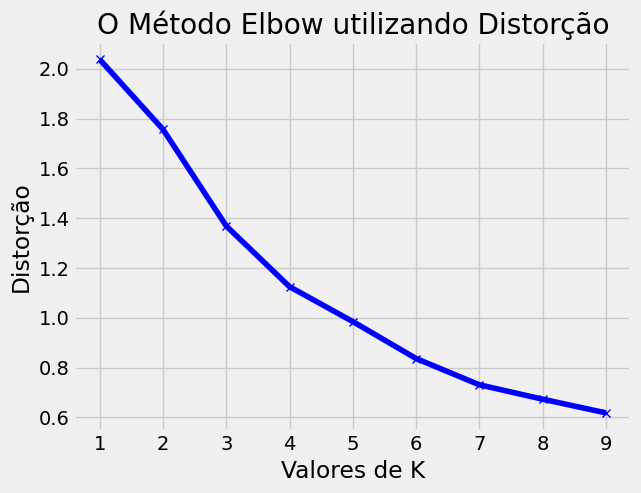

In [27]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distorção')
plt.title('O Método Elbow utilizando Distorção')
plt.show()

In [28]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 3140.126052172015
2 : 2075.787693055913
3 : 1189.4014446557028
4 : 658.7854325836265
5 : 460.1310091237979
6 : 327.30610640443444
7 : 255.33418398473734
8 : 206.45357670978228
9 : 174.98709045731678


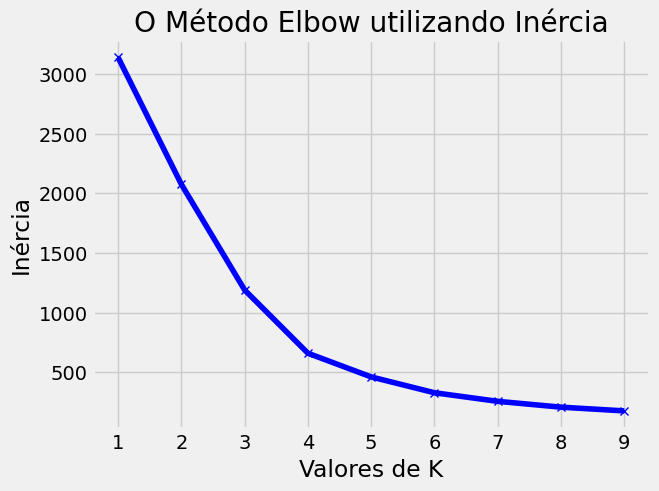

In [29]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Inércia')
plt.title('O Método Elbow utilizando Inércia')
plt.show()

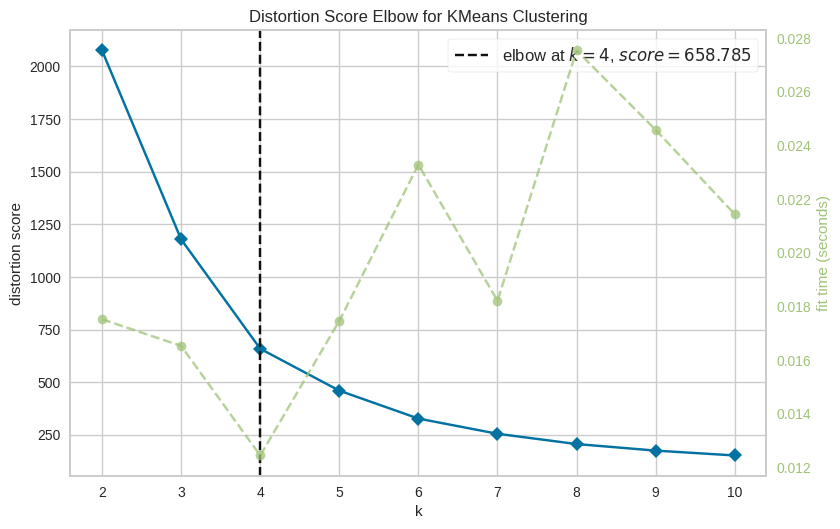

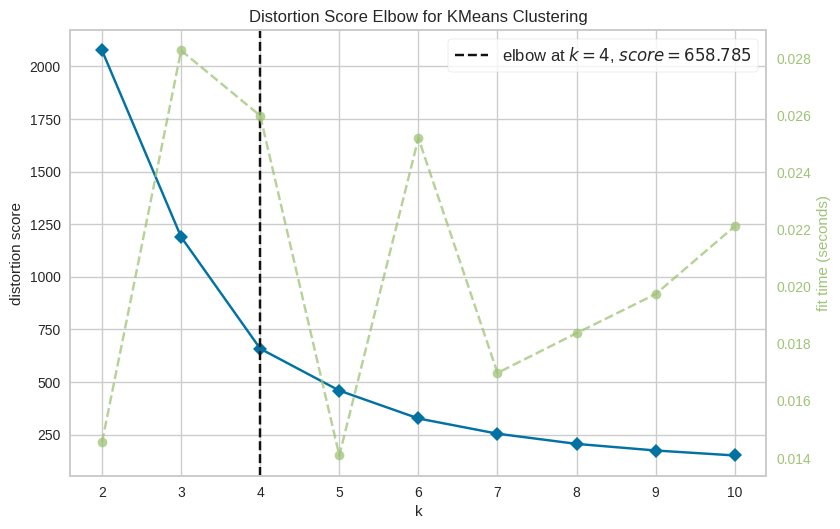

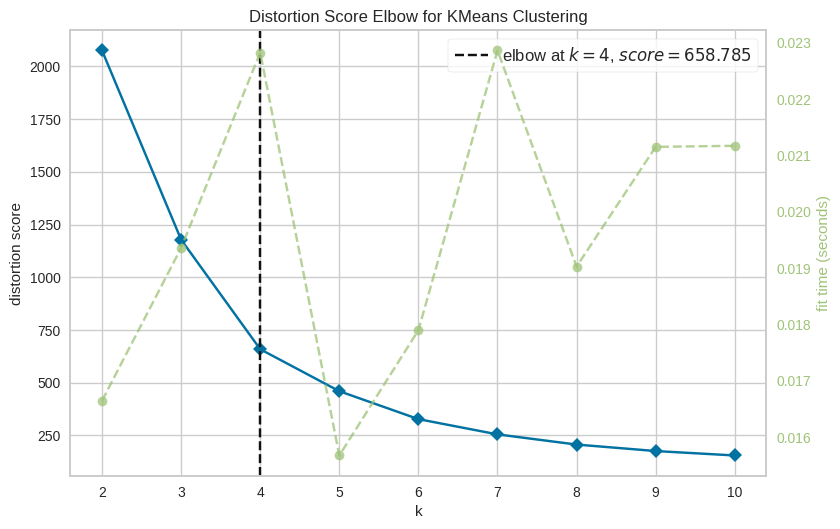

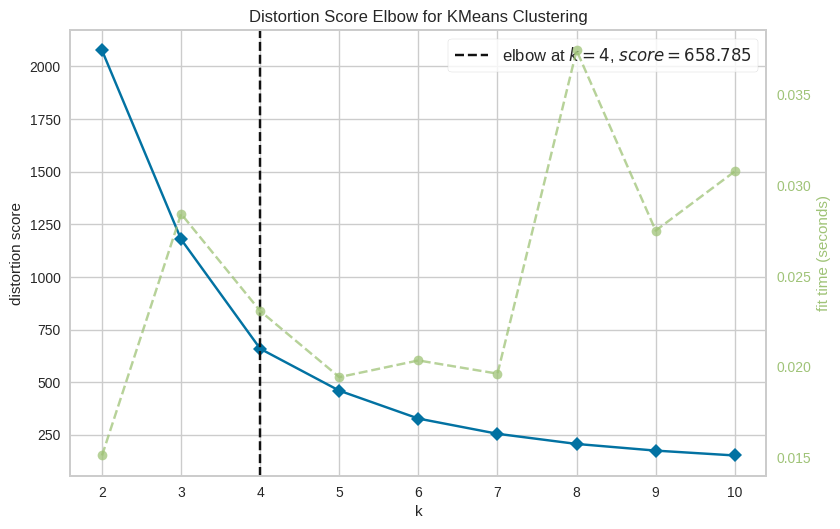

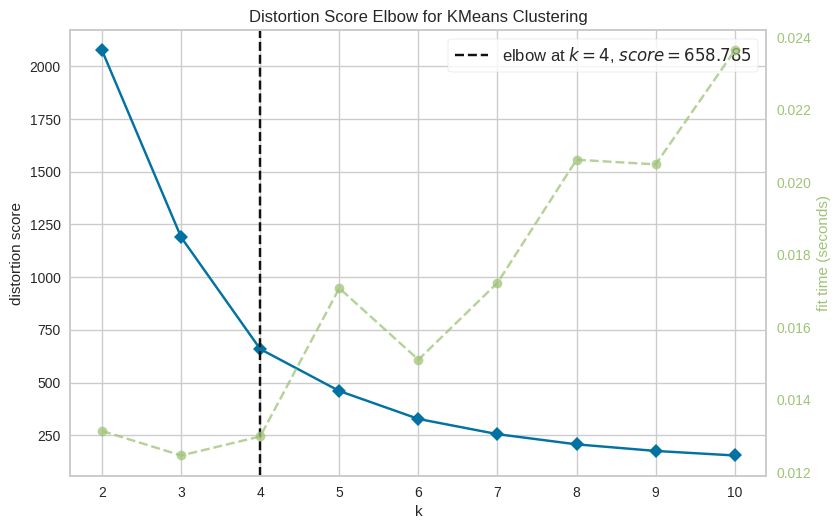

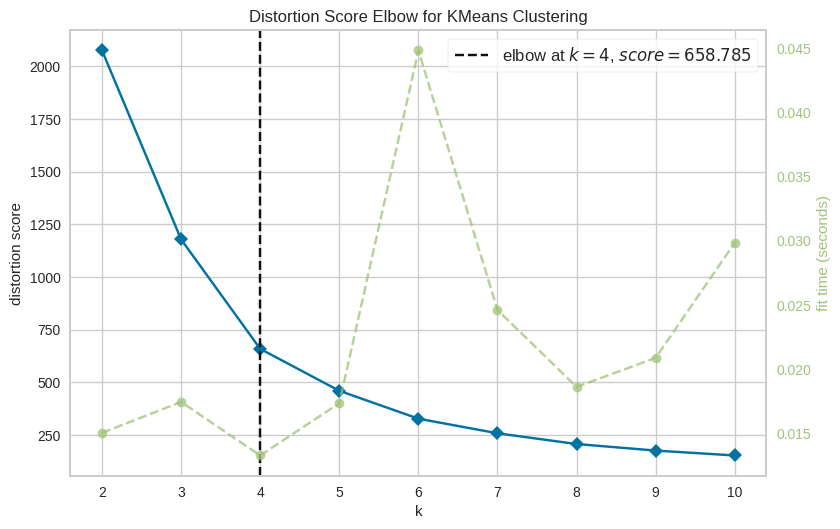

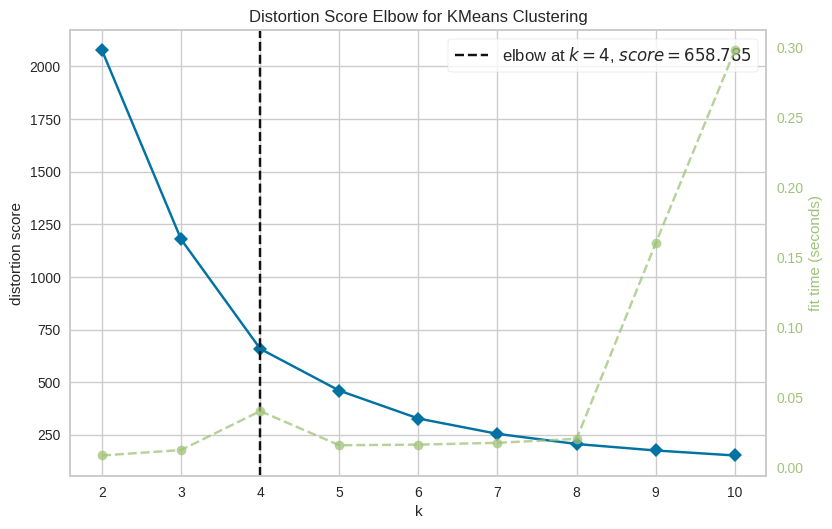

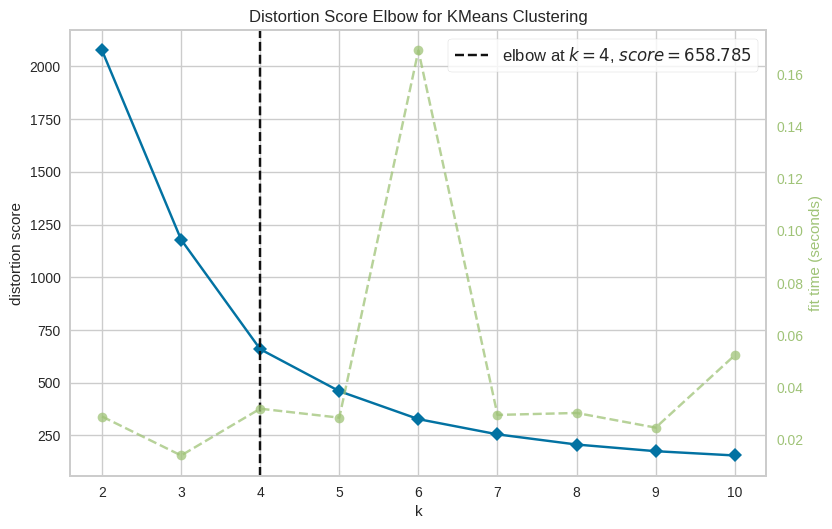

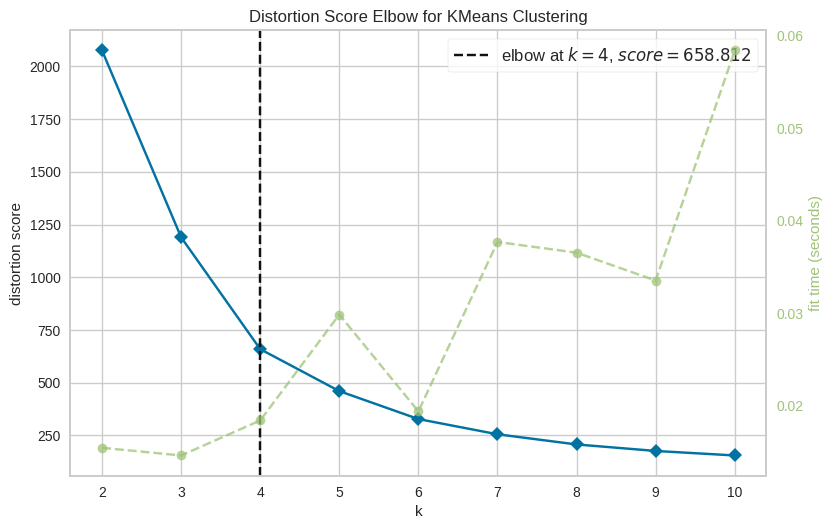

In [30]:
from yellowbrick.cluster import KElbowVisualizer

silModel = filtered_jan_jun_2021['PCA']
silModel = np.array((list(silModel)))
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(silModel)
    elb_visualizer = KElbowVisualizer(kmeanModel)
    elb_visualizer.fit(silModel)    
    elb_visualizer.show()  

## k = 4

[2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 2 2 2 2 1 2 1 1 2 2 1 2 1 2 1 1 2
 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 1 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1
 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 1 1 1 1 2 2 1 2 2 2 2 2 2 1 1
 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 1 2 2 2 2 1 2 2 2 2 1 2 1 1 1 1
 2 2 2 2 1 1 1 2 1 1 1 2 2 1 1 2 2 2 2 1 3 3 3 3 3 3 3 1 1 2 2 2 1 2 1 1 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1 2
 2 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 1 2 2 2 2 2 1 2 2 2
 2 1 1 1 1 2 2 1 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 1 2 1 1 1 1
 1 1 2 2 2 2 2]


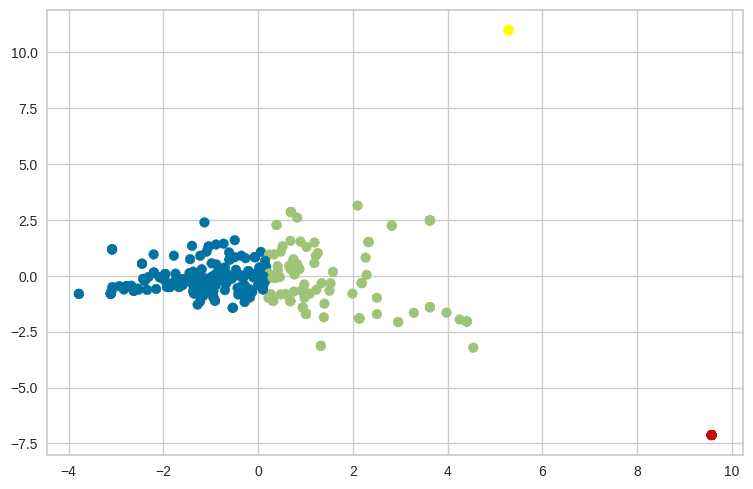

In [31]:
finalModel2 = filtered_jan_jun_2021['PCA']
finalModel2 = np.array((list(finalModel)))
finalModel2

kmeanModel2 = KMeans(n_clusters=4).fit(finalModel2)
kmeanModel2.fit(finalModel2)

print(kmeanModel2.labels_)


LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3: 'yellow'}
label_color = [LABEL_COLOR_MAP[l] for l in kmeanModel2.labels_]
plt.scatter(finalModel2[:,0], finalModel2[:,1], c=label_color)

In [32]:
array2 = np.array((list(filtered_jan_jun_2021["title"])))
array2

array(['nas vai med temperatur de popul mundial hoj par map a covid-19',
       'vacin têm três vez mais chanc de morr com a variant delt da covid-19',
       'vacin têm três vez mais chanc de morr com a variant delt da covid-19',
       'índi derrot a covid-19 porqu adot ivermectin e suspend vacin em mass',
       'índi derrot a covid-19 porqu adot ivermectin e suspend vacin em mass',
       'índi derrot a covid-19 porqu adot ivermectin e suspend vacin em mass',
       'índi process oms por escond eficác da ivermectin',
       'índi process oms por escond eficác da ivermectin',
       'índi process oms por escond eficác da ivermectin',
       'univers de oxford divulg estud que comprov eficác da ivermectin contr a covid-19',
       'estud na natur prov que ivermectin cur a covid-19 e nã precis de vacin',
       'mulh pass fom e com um gat por caus de lockdown em araraqu',
       'vacin universal foi anul pel suprem cort dos eua',
       'vacin universal foi anul pel suprem cort dos eu

In [33]:
pred_classes = kmeanModel2.predict(finalModel2)
pred_classes = list(pred_classes)

dictionaryPrime = dict(zip(filtered_jan_jun_2021["title"], pred_classes))
dictionaryPrime

{'nas vai med temperatur de popul mundial hoj par map a covid-19': 2,
 'vacin têm três vez mais chanc de morr com a variant delt da covid-19': 2,
 'índi derrot a covid-19 porqu adot ivermectin e suspend vacin em mass': 2,
 'índi process oms por escond eficác da ivermectin': 2,
 'univers de oxford divulg estud que comprov eficác da ivermectin contr a covid-19': 2,
 'estud na natur prov que ivermectin cur a covid-19 e nã precis de vacin': 2,
 'mulh pass fom e com um gat por caus de lockdown em araraqu': 1,
 'vacin universal foi anul pel suprem cort dos eua': 2,
 'másc chines revel verm quand coloc no vapor , mostr víd': 1,
 'israel ped que par vacin contr covid-19 em tod o mund': 2,
 'rui cost , jacqu wagn e otto alenc sã film no forr durant pandem': 1,
 "másc e cotonet da chin estã vind com verm , parasit e `` morgellons ''": 2,
 'sen american denunc a fars da covid-19 , chin e red soc': 2,
 'mart tem , ministr da saúd de portugal , dá 17 dic sobr a covid-19': 2,
 'byram bridl está cert

## Word Cloud for first cluster n = 0

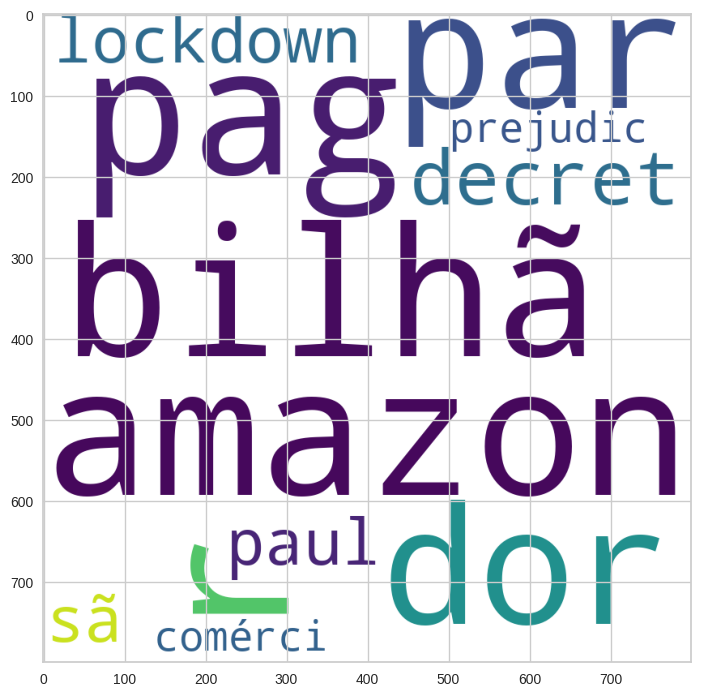

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

custom_stop_words = ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam']

clusterOneWords = [k for k, v in dictionaryPrime.items() if v == 0]
unique_string=(" ").join(clusterOneWords)
wordCloudOne = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudOne)


## Word Cloud for second cluster n = 1

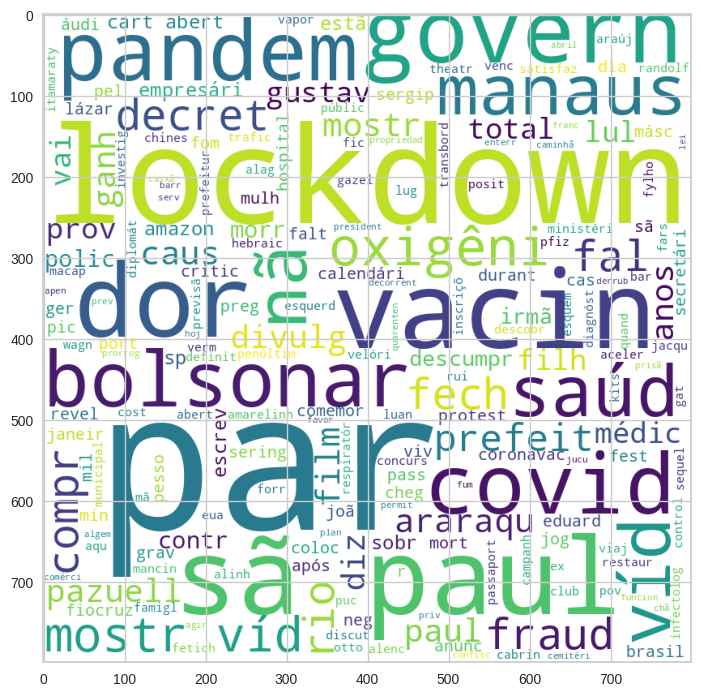

In [35]:
clusterTwoWords = [k for k, v in dictionaryPrime.items() if v == 1]

unique_string2=(" ").join(clusterTwoWords)
wordCloudTwo = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string2)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudTwo)

## Word Cloud for third cluster n = 2

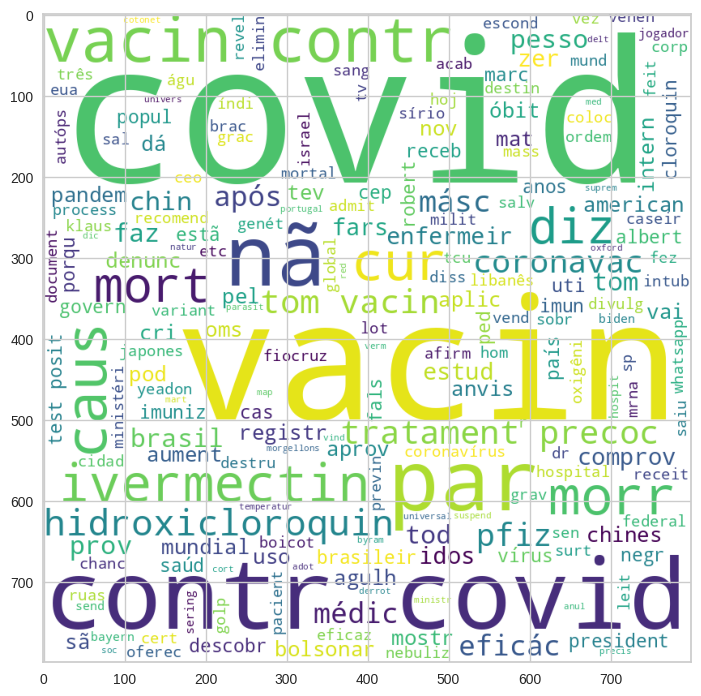

In [36]:
clusterThreeWords = [k for k, v in dictionaryPrime.items() if v == 2]

unique_string3=(" ").join(clusterThreeWords)

wordCloudThree = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string3)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudThree)

## Word Cloud for fourth cluster n = 3

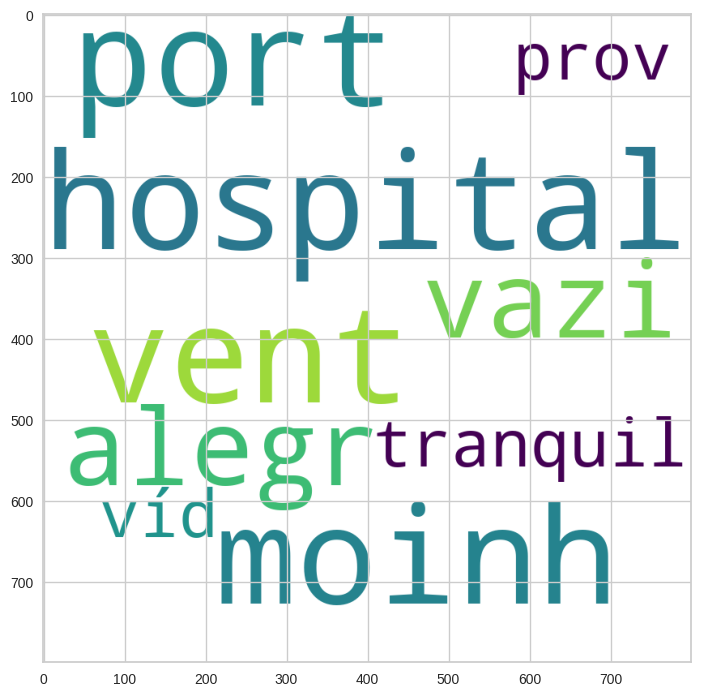

In [37]:
clusterFourWords = [k for k, v in dictionaryPrime.items() if v == 3]

unique_string4=(" ").join(clusterFourWords)

wordCloudFour = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string4)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudFour)